# ACC Data Analysis

In [37]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Import CSV
df = pd.read_csv("ACC-Data-2023-04-23-16-27-08.csv", index_col=0)
df

,Track,Car,CarClass,Session,SessionStatus,Flag,Penalty,InPit,InPitLane,CurrentSector,...,BrakeTemperatureFrontRight,BrakeTemperatureRearLeft,BrakeTemperatureRearRight,BrakeBalance,ABS,FrontBrakeCompound,RearBrakeCompound,CurrentFuel,UsedFuel,EstimatedFuelLaps
0,valencia,porsche_992_gt3_r,gt3,2,2,0,0,0,0,0,...,0.000,0.000,0.000,0.000,6,0,0,0.000,0.000,22.963
1,valencia,porsche_992_gt3_r,gt3,2,2,0,0,0,0,0,...,0.000,0.000,0.000,0.000,6,0,0,0.000,0.000,22.963
2,valencia,porsche_992_gt3_r,gt3,2,2,0,0,0,0,0,...,0.000,0.000,0.000,0.000,6,0,0,0.000,0.000,22.963
3,valencia,porsche_992_gt3_r,gt3,2,2,0,0,0,0,0,...,0.000,0.000,0.000,0.000,6,0,0,0.000,0.000,22.963
4,valencia,porsche_992_gt3_r,gt3,2,2,0,0,0,0,0,...,0.000,0.000,0.000,0.000,6,0,0,0.000,0.000,22.963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,valencia,porsche_992_gt3_r,gt3,2,2,0,0,0,0,0,...,387.123,384.276,384.823,0.738,4,1,1,16.744,23.256,7.745
1107,valencia,porsche_992_gt3_r,gt3,2,2,0,0,0,0,0,...,368.199,374.201,374.730,0.738,4,1,1,16.742,23.258,7.744
1108,valencia,porsche_992_gt3_r,gt3,2,2,0,0,0,0,0,...,350.988,364.787,365.299,0.738,4,1,1,16.740,23.260,7.743
1109,valencia,porsche_992_gt3_r,gt3,2,2,0,0,0,0,0,...,335.287,355.973,356.470,0.738,4,1,1,16.738,23.262,7.742


In [39]:
# Data cleaning
# Data frame "df" contains all relevant data points
df = df[df["SessionStatus"] == 2]
df = df[df["Session"] == 2]
df = df[df["LapsCompleted"] > 0]

In [40]:
# Data cleaning pt. 2
# Data frame "df_laps" contains data from the first data point after a new lap begins
df_laps = df.drop_duplicates(subset="LapsCompleted")
df_laps = df_laps.iloc[1:]

In [41]:
# Constants
chart_size_x = 9
chart_size_y = 6

## General Statistics

### Tyre Pressure

In [42]:
df.agg({"TyrePressureFrontLeft": ["min", "median", "max"], "TyrePressureFrontRight": ["min", "median", "max"], "TyrePressureRearLeft": ["min", "median", "max"], "TyrePressureRearRight": ["min", "median", "max"]})

,TyrePressureFrontLeft,TyrePressureFrontRight,TyrePressureRearLeft,TyrePressureRearRight
min,26.085,26.288,26.000,25.992
median,26.859,27.080,26.742,26.891
max,27.399,27.886,27.197,27.133


### Tyre Temperature

In [43]:
df.agg({"TyreTemperatureFrontLeft": ["min", "median", "max"], "TyreTemperatureFrontRight": ["min", "median", "max"], "TyreTemperatureRearLeft": ["min", "median", "max"], "TyreTemperatureRearRight": ["min", "median", "max"]})

,TyreTemperatureFrontLeft,TyreTemperatureFrontRight,TyreTemperatureRearLeft,TyreTemperatureRearRight
min,77.198,86.627,83.715,88.673
median,85.695,94.926,91.982,98.099
max,91.295,103.286,97.316,100.752


### Weather

In [44]:
df.agg({"AmbientTemperature": ["min", "median", "max"], "TrackTemperature": ["min", "median", "max"]})

,AmbientTemperature,TrackTemperature
min,30.634,38.777
median,30.688,38.951
max,30.736,39.108


## Charts

## Consistency

In [ ]:
x_axis = df[""]

### Tyre Pressure

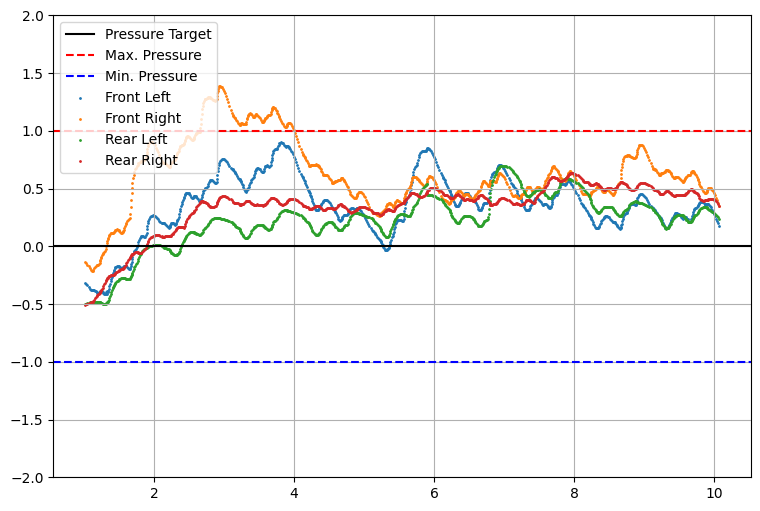

In [45]:
# Tyre Pressure
x_axis = df["LapsCompleted"] + df["TrackPosition"]
target_psi = 26.5
y_axis_1, y_axis_2, y_axis_3, y_axis_4  = df["TyrePressureFrontLeft"] - target_psi, df["TyrePressureFrontRight"] - target_psi, df["TyrePressureRearLeft"] - target_psi, df["TyrePressureRearRight"] - target_psi
plt.figure(figsize=(chart_size_x,chart_size_y))
plt.ylim(-2, 2)
plt.axhline(y=0, color="black", linestyle="solid", label="Pressure Target")
plt.axhline(y=1, color="red", linestyle="--", label="Max. Pressure")
plt.axhline(y=-1, color="blue", linestyle="--", label="Min. Pressure")
plt.scatter(x_axis, y_axis_1, s=1, label="Front Left")
plt.scatter(x_axis, y_axis_2, s=1, label="Front Right")
plt.scatter(x_axis, y_axis_3, s=1, label="Rear Left")
plt.scatter(x_axis, y_axis_4, s=1, label="Rear Right")
plt.legend(loc="upper left")
plt.grid()
plt.show()

### Tyre Temperature

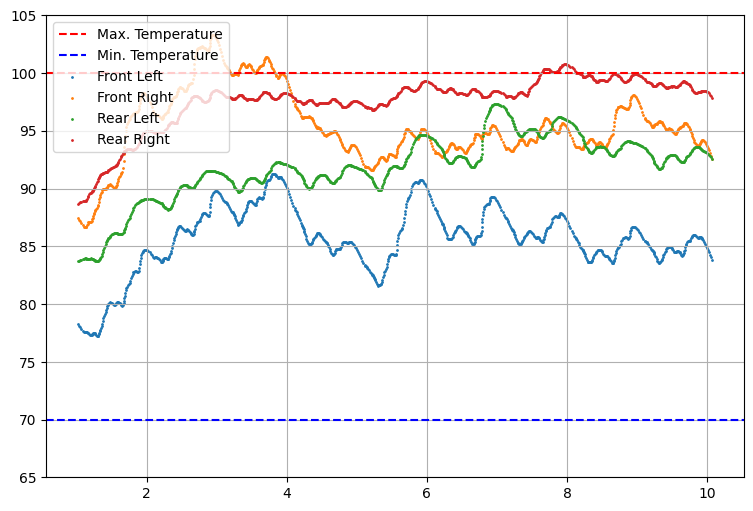

In [46]:
# Tyre Temperature
x_axis = df["LapsCompleted"] + df["TrackPosition"]
y_axis_1, y_axis_2, y_axis_3, y_axis_4  = df["TyreTemperatureFrontLeft"], df["TyreTemperatureFrontRight"], df["TyreTemperatureRearLeft"], df["TyreTemperatureRearRight"]
plt.figure(figsize=(chart_size_x,chart_size_y))
plt.ylim(65, 105)
plt.axhline(y=100, color="red", linestyle="--", label="Max. Temperature")
plt.axhline(y=70, color="blue", linestyle="--", label="Min. Temperature")
plt.scatter(x_axis, y_axis_1, s=1, label="Front Left")
plt.scatter(x_axis, y_axis_2, s=1, label="Front Right")
plt.scatter(x_axis, y_axis_3, s=1, label="Rear Left")
plt.scatter(x_axis, y_axis_4, s=1, label="Rear Right")
plt.legend(loc="upper left")
plt.grid()
plt.show()

### Brake Temperature

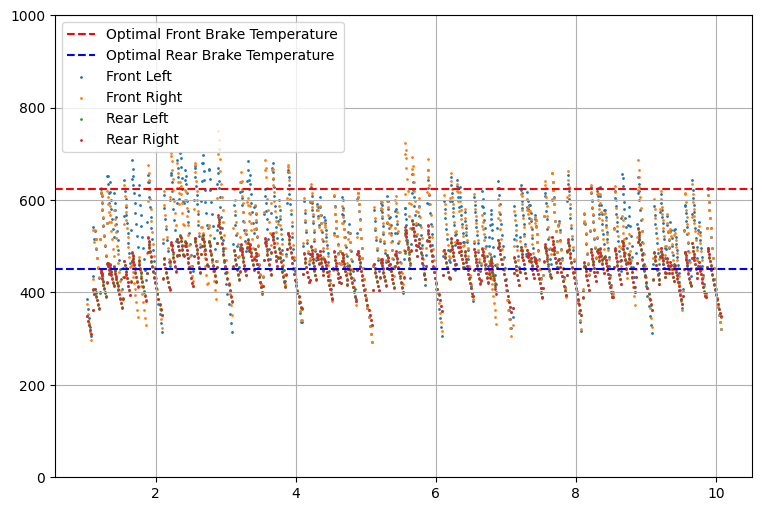

In [47]:
# Brake Temperature
x_axis = df["LapsCompleted"] + df["TrackPosition"]
y_axis_1, y_axis_2, y_axis_3, y_axis_4  = df["BrakeTemperatureFrontLeft"], df["BrakeTemperatureFrontRight"], df["BrakeTemperatureRearLeft"], df["BrakeTemperatureRearRight"]
plt.figure(figsize=(chart_size_x,chart_size_y))
plt.ylim(0, 1000)
plt.axhline(y=625, color="red", linestyle="--", label="Optimal Front Brake Temperature")
plt.axhline(y=450, color="blue", linestyle="--", label="Optimal Rear Brake Temperature")
plt.scatter(x_axis, y_axis_1, s=1, label="Front Left")
plt.scatter(x_axis, y_axis_2, s=1, label="Front Right")
plt.scatter(x_axis, y_axis_3, s=1, label="Rear Left")
plt.scatter(x_axis, y_axis_4, s=1, label="Rear Right")
plt.legend(loc="upper left")
plt.grid()
plt.show()